#**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import pandas as pd
import math
from math import sqrt
from scipy import stats
from datetime import datetime

#**Read Dataset**

In [ ]:
#from google.colab import drive
#drive.mount("/content/drive")

#jika dari dataset github
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/USGS/eq_1970_M6.csv"
data = pd.read_csv(dataset)
data

,time,latitude,longitude,depth,mag,magType,place
0,2017-12-15T16:47:58.230Z,-7.4921,108.1743,90.0,6.5,mww,"1km E of Kampungbaru, Indonesia"
1,2017-12-13T18:03:43.920Z,-54.2189,2.1628,17.0,6.5,mww,"80km WNW of Bouvet Island, Bouvet Island"
2,2017-12-12T21:41:31.140Z,30.8275,57.2982,8.0,6.0,mww,"63km NNE of Kerman, Iran"
3,2017-12-12T08:43:18.320Z,30.7372,57.2795,12.0,6.0,mww,"53km NNE of Kerman, Iran"
4,2017-12-09T15:14:24.770Z,10.0928,140.2016,10.0,6.1,mww,"50km NW of Fais, Micronesia"
...,...,...,...,...,...,...,...
6709,1970-01-10T12:07:07.000Z,6.7850,126.6820,40.0,7.2,mw,"Mindanao, Philippines"
6710,1970-01-08T17:12:41.000Z,-34.8500,178.7820,199.4,6.8,mw,south of the Kermadec Islands
6711,1970-01-07T07:56:14.000Z,15.7850,-59.8080,36.7,6.0,mw,"east of Guadeloupe, Leeward Islands"
6712,1970-01-06T05:35:54.000Z,-9.5830,151.4930,15.0,6.3,mw,D'Entrecasteaux Islands region


In [ ]:
#reduksi kolom
data = data[['time', 'latitude', 'longitude', 'depth', 'mag','magType']]
data

,time,latitude,longitude,depth,mag,magType
0,2017-12-15T16:47:58.230Z,-7.4921,108.1743,90.0,6.5,mww
1,2017-12-13T18:03:43.920Z,-54.2189,2.1628,17.0,6.5,mww
2,2017-12-12T21:41:31.140Z,30.8275,57.2982,8.0,6.0,mww
3,2017-12-12T08:43:18.320Z,30.7372,57.2795,12.0,6.0,mww
4,2017-12-09T15:14:24.770Z,10.0928,140.2016,10.0,6.1,mww
...,...,...,...,...,...,...
6709,1970-01-10T12:07:07.000Z,6.7850,126.6820,40.0,7.2,mw
6710,1970-01-08T17:12:41.000Z,-34.8500,178.7820,199.4,6.8,mw
6711,1970-01-07T07:56:14.000Z,15.7850,-59.8080,36.7,6.0,mw
6712,1970-01-06T05:35:54.000Z,-9.5830,151.4930,15.0,6.3,mw


**Plot Tipe Magnitude**

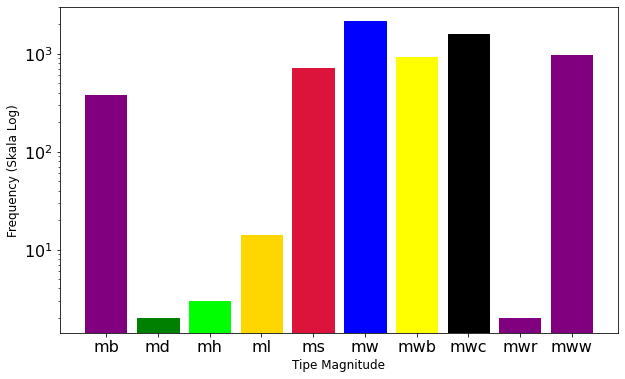

In [ ]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
list_1=[1 for i in range(6714)]
data['ones']=list_1

grouped=data.iloc[:,6].groupby(data['magType'])
data['magType'].sort_values(ascending=False) 
grouped_DATA_Magnitude=grouped.sum()
index_grouped_DATA_Magnitude=grouped_DATA_Magnitude.index
ax1=plt.bar(index_grouped_DATA_Magnitude,grouped_DATA_Magnitude,color='purple')#,align='left')
plt.xlabel("Tipe Magnitude",fontsize=12)
plt.ylabel("Frequency (Skala Log)",fontsize=12)
plt.yscale('log')
ax1[1].set_color('green')
ax1[2].set_color('lime')
ax1[3].set_color('gold')
ax1[4].set_color('crimson')
ax1[5].set_color('blue')
ax1[6].set_color('yellow')
ax1[7].set_color('black')
plt.tick_params(labelsize=16) 

Filter Gempa Utama

In [ ]:
 data1=data[data['magType']=="mw"]
 data2=data[data['magType']=="mwb"]
 data3=data[data['magType']=="mwc"]
 data4=data[data['magType']=="mwr"]
 data5=data[data['magType']=="mww"]
 
 ambildata=pd.concat([data1, data2, data3, data4, data5])
 
 ambildata

,time,latitude,longitude,depth,mag,magType,ones
441,2014-08-24T10:20:44.070Z,38.215167,-122.312333,11.120,6.02,mw,1
538,2014-03-10T05:18:13.430Z,40.828667,-125.133833,16.441,6.80,mw,1
797,2012-04-11T08:38:36.720Z,2.327000,93.063000,20.000,8.60,mw,1
1154,2010-04-04T22:40:42.360Z,32.286167,-115.295333,9.987,7.20,mw,1
1185,2010-02-27T10:30:10.000Z,-37.878000,-73.545000,20.000,6.00,mw,1
...,...,...,...,...,...,...,...
1269,2009-10-03T17:36:06.120Z,23.630000,121.452000,28.000,6.10,mww,1
1391,2008-11-16T17:02:32.700Z,1.271000,122.091000,30.000,7.40,mww,1
1619,2007-09-12T11:10:26.830Z,-4.438000,101.367000,34.000,8.40,mww,1
2002,2005-03-28T16:09:36.530Z,2.085000,97.108000,30.000,8.60,mww,1


In [ ]:
#reduksi kolom
datafix = ambildata[['time', 'latitude', 'longitude', 'depth', 'mag','magType']]
datafix

,time,latitude,longitude,depth,mag,magType
441,2014-08-24T10:20:44.070Z,38.215167,-122.312333,11.120,6.02,mw
538,2014-03-10T05:18:13.430Z,40.828667,-125.133833,16.441,6.80,mw
797,2012-04-11T08:38:36.720Z,2.327000,93.063000,20.000,8.60,mw
1154,2010-04-04T22:40:42.360Z,32.286167,-115.295333,9.987,7.20,mw
1185,2010-02-27T10:30:10.000Z,-37.878000,-73.545000,20.000,6.00,mw
...,...,...,...,...,...,...
1269,2009-10-03T17:36:06.120Z,23.630000,121.452000,28.000,6.10,mww
1391,2008-11-16T17:02:32.700Z,1.271000,122.091000,30.000,7.40,mww
1619,2007-09-12T11:10:26.830Z,-4.438000,101.367000,34.000,8.40,mww
2002,2005-03-28T16:09:36.530Z,2.085000,97.108000,30.000,8.60,mww


**Menghitung B-Values dan standar kesalahan dengan Metode Aki, Shi & Bolt**

#**Menghitung a-value and b-value**



In [ ]:
binning=0.1
#data["B - Value"] = np.sqrt(data["mag"])
datafix["B - Value"] = np.math.log10(math.exp(1))/(ambildata.mag.mean()-(data["mag"]-binning/2))
datafix["A - Value"] = np.log10(ambildata.mag.shape[0]) + (math.log10(math.exp(1))/(ambildata.mag.mean()-(data["mag"]-binning/2))) * ambildata.mag.min()
datafix['dt_time'] = datafix['time'].apply(lambda x: 
                                 datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%fZ'))
datafix["tahun"] = datafix['dt_time'].apply(lambda x: x.year)
datalagi = datafix
datalagi

,time,latitude,longitude,depth,mag,magType,B - Value,A - Value,dt_time,tahun
441,2014-08-24T10:20:44.070Z,38.215167,-122.312333,11.120,6.02,mw,1.040431,9.991392,2014-08-24 10:20:44.070,2014
538,2014-03-10T05:18:13.430Z,40.828667,-125.133833,16.441,6.80,mw,-1.197783,-3.437888,2014-03-10 05:18:13.430,2014
797,2012-04-11T08:38:36.720Z,2.327000,93.063000,20.000,8.60,mw,-0.200822,2.543875,2012-04-11 08:38:36.720,2012
1154,2010-04-04T22:40:42.360Z,32.286167,-115.295333,9.987,7.20,mw,-0.569505,0.331776,2010-04-04 22:40:42.360,2010
1185,2010-02-27T10:30:10.000Z,-37.878000,-73.545000,20.000,6.00,mw,0.992859,9.705964,2010-02-27 10:30:10.000,2010
...,...,...,...,...,...,...,...,...,...,...
1269,2009-10-03T17:36:06.120Z,23.630000,121.452000,28.000,6.10,mww,1.287111,11.471476,2009-10-03 17:36:06.120,2009
1391,2008-11-16T17:02:32.700Z,1.271000,122.091000,30.000,7.40,mww,-0.451177,1.041748,2008-11-16 17:02:32.700,2008
1619,2007-09-12T11:10:26.830Z,-4.438000,101.367000,34.000,8.40,mww,-0.221287,2.421084,2007-09-12 11:10:26.830,2007
2002,2005-03-28T16:09:36.530Z,2.085000,97.108000,30.000,8.60,mww,-0.200822,2.543875,2005-03-28 16:09:36.530,2005


In [ ]:
#reduksi kolom
fixkolom = datalagi[['time','latitude', 'longitude', 'depth', 'mag','magType','tahun','B - Value','A - Value']]
fixkolom

,time,latitude,longitude,depth,mag,magType,tahun,B - Value,A - Value
441,2014-08-24T10:20:44.070Z,38.215167,-122.312333,11.120,6.02,mw,2014,1.040431,9.991392
538,2014-03-10T05:18:13.430Z,40.828667,-125.133833,16.441,6.80,mw,2014,-1.197783,-3.437888
797,2012-04-11T08:38:36.720Z,2.327000,93.063000,20.000,8.60,mw,2012,-0.200822,2.543875
1154,2010-04-04T22:40:42.360Z,32.286167,-115.295333,9.987,7.20,mw,2010,-0.569505,0.331776
1185,2010-02-27T10:30:10.000Z,-37.878000,-73.545000,20.000,6.00,mw,2010,0.992859,9.705964
...,...,...,...,...,...,...,...,...,...
1269,2009-10-03T17:36:06.120Z,23.630000,121.452000,28.000,6.10,mww,2009,1.287111,11.471476
1391,2008-11-16T17:02:32.700Z,1.271000,122.091000,30.000,7.40,mww,2008,-0.451177,1.041748
1619,2007-09-12T11:10:26.830Z,-4.438000,101.367000,34.000,8.40,mww,2007,-0.221287,2.421084
2002,2005-03-28T16:09:36.530Z,2.085000,97.108000,30.000,8.60,mww,2005,-0.200822,2.543875


#**Variasi temporal nilai-b**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


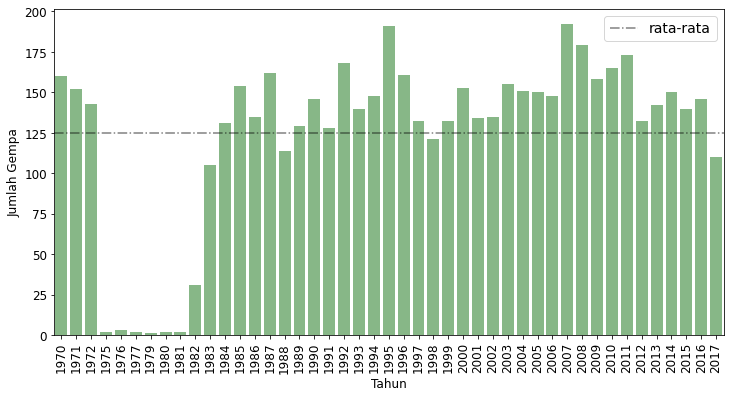

In [ ]:
# Menghitung jumlah kejadian gempa per waktu (DMY) 
dofy_tot = fixkolom['dofy'].value_counts(sort=True)
dofy_tot.sort_index(axis=0, inplace=True)

year_tot = fixkolom['year'].value_counts(sort=True)
b_tot = fixkolom['B - Value'].value_counts(sort=True)
b_tot2 = fixkolom['B - Value'].values

# Menghitung rata-rata kejadian gempa per waktu (DMY) 
year_ave = year_tot.mean()
b_ave = b_tot.mean()
b_ave2 = b_tot2.mean()


# Plot Bar Chart
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(12,6))

sns.barplot(year_tot.index, year_tot.values, alpha=0.5, color='green')
plt.axhline(y=year_ave, color='k', linestyle='-.', 
            alpha=0.5, label='rata-rata')
plt.xlabel('Tahun'), plt.ylabel('Jumlah Gempa')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()     

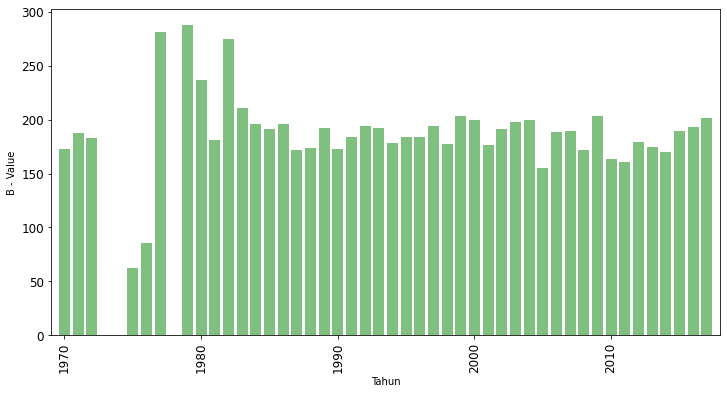

In [ ]:
# Plot Bar Chart
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10

fig,axes=plt.subplots(1,1,figsize=(12,6))
list_1=[1 for i in range(5608)]
fixkolom['B - Value']=list_1

grouped=fixkolom.iloc[:,10].groupby(fixkolom['tahun'])
fixkolom['tahun'].sort_values(ascending=False) 
grouped_DATA_BValue=grouped.mean()
index_grouped_DATA_BValue=grouped_DATA_BValue.index
ax1=plt.bar(index_grouped_DATA_BValue,grouped_DATA_BValue,alpha=0.5, color='green')#,align='left')

plt.xlabel("Tahun")
plt.ylabel("B - Value")
plt.xlim([1969, 2018])
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=12) 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

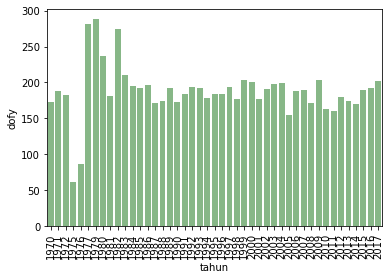

In [ ]:
sns.barplot(index_grouped_DATA_BValue,grouped_DATA_BValue, alpha=0.5, color='green')
plt.xticks(rotation='vertical')

*   Parameter seismitas atau yang biasa disebut **nilai-a** merupakan parameter seismik yang nilainya bergantung pada jumlah kejadian gempa bumi
*   Parameter tektonik atau **nilai-b** dapat mencerminkan akumulasi stress lokal sehingga dapat menjadi parameter kegempaan yang didapat dari frekuensi relatif dari jumlah kejadian gempa besar dan gempa kecil di suatu wilayah. Selain itu, Nilai-b digunakan untuk mengetahui perubahan fenomena fisis yang diamati sebelum terjadinya gempa bumi

In [ ]:
old=[0,1,2,3]
new=['Magnitude','B_value', 'A-Value','Tahun']
table_errors_b_value_magnitude=pd.DataFrame([list_bin,list_b, list_a, dataa]).T
table_errors_b_value_magnitude.rename(columns=dict(zip(old,new)),inplace=True)
table_errors_b_value_magnitude.he

In [ ]:
hist, edges = np.histogram(a=ambildata.mag.values.round(1), bins=101, range=(0,10))
chist = np.cumsum(hist[::-1])[::-1]

In [ ]:
def fmd_values(magnitudes, bin_width=0.1):
    length = magnitudes.shape[0]
    minimum = magnitudes.min()
    average = magnitudes.mean()
    #b_value = (1 / (average - (minimum - (bin_width/2)))) * np.log10(np.exp(1))
    b_value=math.log10(math.exp(1))/(mean_magn-(M_cutoff-binning/2))
    square_every_value = np.vectorize(lambda x: x**2)
    b_stddev = square_every_value((magnitudes - average).sum()) / (length * (length - 1))
    b_stddev = 2.3 * np.sqrt(b_stddev) * b_value**2
    a_value = np.log10(length) + b_value * minimum
    
    return a_value, b_value, b_stddev, length, minimum

In [ ]:
a, b, bstd, n, minimum = fmd_values(ambildata.mag.values)
print(a)
print(b)
print(bstd)
print(minimum)

In [ ]:
x = np.linspace(0,10, 100)
y = 10**(a - b*x)

In [ ]:
fig=plt.figure(figsize=(10,7))

plt.plot(edges[:-1], hist, marker='s', color='blue', linestyle='')
plt.plot(edges[:-1], chist, marker='^', color='red', linestyle='')

plt.plot(x,y)
label = r'a = {:.2f}'.format(a) + '\n' + r'b = {:.2f} $\pm$ {:.20f}'.format(b,bstd) + '\n' + 'Magnitude Completenes = {:.2f}'.format(minimum)

plt.yscale('log')
plt.ylabel('Cummulative Number')
plt.xlabel('Magnitude')
plt.xlim(5.5, 9)
plt.ylim(1e0, 1e4)
plt.title('Distribusi Gutenburg-Richter')
plt.legend([label])
plt.show()